In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.plotting import table

In [116]:
df_orig = pd.read_pickle('accidents.pkl.gz')
df2 = df_orig.copy()

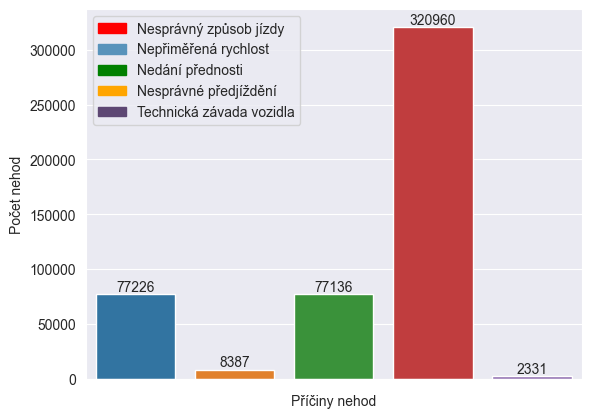

                                              Počet nehod
Popis nehody                                             
Nevěnování se řízení                                96820
Nesprávné otáčení nebo couvání                      48920
Jiný druh nesprávné jízdy                           46212
Nedodržení bezpečné vzdálenosti                     40631
Nezvládnutí řízení vozidla                          31294
Vyhýbání se bez dostatečného bočního odstupu        23954
Jízda po nesprávné straně                           15055
Vjetí na nezpevněnou komunikaci                      5046
Samovolné rozjetí vozidla                            4844
Agresivní jízda                                      4606
Chyby při udání směru jízdy                          2976
Náhlé bezdůvodné zpomalení, zastavení                 256
Jízda jednosměrnou ulicí v opačném směru              173
Nehoda při provádění služeního zákroku                158
Násilné zastavení vozidla policií                      14
Nehoda v důsle

,Počet nehod
Popis nehody,
Nevěnování se řízení,96820
Nesprávné otáčení nebo couvání,48920
Jiný druh nesprávné jízdy,46212
Nedodržení bezpečné vzdálenosti,40631
Nezvládnutí řízení vozidla,31294
Vyhýbání se bez dostatečného bočního odstupu,23954
Jízda po nesprávné straně,15055
Vjetí na nezpevněnou komunikaci,5046
Samovolné rozjetí vozidla,4844


In [150]:
df2['p12'] = df2['p12'].astype(int)

df2['neprimerenaRychlost'] = df2['p12'].between(201, 209)
df2['nespravnePredjizdeni'] = df2['p12'].between(301, 311)
df2['nedaniPrednosti'] = df2['p12'].between(401, 414)
df2['nespravnyZpusobJizdy'] = df2['p12'].between(501, 516)
df2['technickaZavadaVozidla'] = df2['p12'].between(601, 615)

data_to_plot = pd.DataFrame.from_dict({'neprimerenaRychlost': [df2['neprimerenaRychlost'].value_counts()[True]],
                                       'nespravnePredjizdeni': [df2['nespravnePredjizdeni'].value_counts()[True]],
                                       'nedaniPrednosti': [df2['nedaniPrednosti'].value_counts()[True]],
                                       'nespravnyZpusobJizdy': [df2['nespravnyZpusobJizdy'].value_counts()[True]],
                                       'technickaZavadaVozidla': [df2['technickaZavadaVozidla'].value_counts()[True]]
                                       })

sns.set_style("darkgrid")
ax = sns.barplot(data=data_to_plot)
ax.set_xlabel("Příčiny nehod")
ax.set_ylabel("Počet nehod")
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i, )

crash_causes = ["Nepřiměřená rychlost",
                "Nesprávné předjíždění",
                "Nedání přednosti",
                "Nesprávný způsob jízdy",
                "Technická závada vozidla"]

lg1 = mpatches.Patch(color='red', label='Nesprávný způsob jízdy')
lg2 = mpatches.Patch(color='#5893bb', label='Nepřiměřená rychlost')
lg3 = mpatches.Patch(color='green', label='Nedání přednosti')
lg4 = mpatches.Patch(color='orange', label='Nesprávné předjíždění')
lg5 = mpatches.Patch(color='#5d4773', label='Technická závada vozidla')
plt.legend(handles=[lg1, lg2, lg3, lg4, lg5])
plt.show() # TODO DELETE
plt.savefig("fig.png", dpi=200)
plt.close()

# Filter data to show only crashes caused by bad driving method
bad_driving_labels = {
    501: "Jízda po nesprávné straně",
    502: "Vyhýbání se bez dostatečného bočního odstupu",
    503: "Nedodržení bezpečné vzdálenosti",
    504: "Nesprávné otáčení nebo couvání",
    505: "Chyby při udání směru jízdy",
    506: "Agresivní jízda",
    507: "Náhlé bezdůvodné zpomalení, zastavení",
    508: "Nevěnování se řízení",
    509: "Samovolné rozjetí vozidla",
    510: "Vjetí na nezpevněnou komunikaci",
    511: "Nezvládnutí řízení vozidla",
    512: "Jízda jednosměrnou ulicí v opačném směru",
    513: "Násilné zastavení vozidla policií",
    514: "Nehoda v důsledku použití služební zbraně",
    515: "Nehoda při provádění služebního zákroku",
    516: "Jiný druh nesprávné jízdy"
}

df2['Popis nehody'] = df2['p12'].map(bad_driving_labels)
filtered_data = df2[df2['p12'].between(501, 516)]
filtered_data = filtered_data.groupby(['Popis nehody']).agg({'p1': 'count'})
filtered_data = filtered_data.sort_values(by='p1', ascending=False)
filtered_data = filtered_data.rename(columns={'p1': 'Počet nehod'})
print(filtered_data)

lack_of_attention = filtered_data.head(1).values[0]
lack_of_attention

calc1_dataset = df2[df2['p12'].between(501, 516)]
calc1_dataset = calc1_dataset.groupby(['Popis nehody']).agg({'p1': 'count', 'p13a': 'sum'}).reset_index()
calc1_dataset['p13a'] = calc1_dataset['p13a'].astype(int)
calc1_dataset['p1'] = calc1_dataset['p1'].astype(int)
calc1_dataset['Úmrtnost'] = (calc1_dataset['p13a'] / calc1_dataset['p1']) * 100
calc1_dataset = calc1_dataset.sort_values(by='Úmrtnost', ascending=False)
calc1_dataset
highest_death_rate = calc1_dataset.head(1)
print(f'\nNejvyšší úmrtnost při nehodách způsobených nesprávným způsobem jízdy'
      f' se stala z důvodu \"{highest_death_rate["Popis nehody"].values[0]}\" a byla {"%.2f" % round(highest_death_rate["Úmrtnost"].values[0], 2)} %.')

calc2_dataset = df2[df2['p12'].between(501, 516) & df2['p11'] > 0]
calc2_dataset = calc2_dataset.groupby(['Popis nehody']).agg({'p1': 'count'}).reset_index()
calc2_dataset = calc2_dataset.sort_values(by='p1', ascending=False)

alcohol_perct = lack_of_attention[0] / calc2_dataset['p1'].values[0]
print(f'\nU nehod způsobených nesprávným způsobem jízdy figuroval alkohol v největší míře u druhu nehody "Nevěnování se řízení" a to v {"%.2f" % round(alcohol_perct, 2)} % nehod.')

calc3_dataset = df2[df2['p12'].between(501, 516)]

city = calc3_dataset[calc3_dataset['p5a'] == 1].agg({'p1': 'count'})[0]
outside_city = calc3_dataset[calc3_dataset['p5a'] == 2].agg({'p1': 'count'})[0]
print(f'\nZ nehod, které byly způsobeny nesprávným způsobem jízdy se stalo {city} ({"%.2f" % round(city / 320960 * 100, 2)} %) ve obcích a {outside_city} ({"%.2f" % round(outside_city / 320960 * 100, 2)} %) mimo obce.')



filtered_data